In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

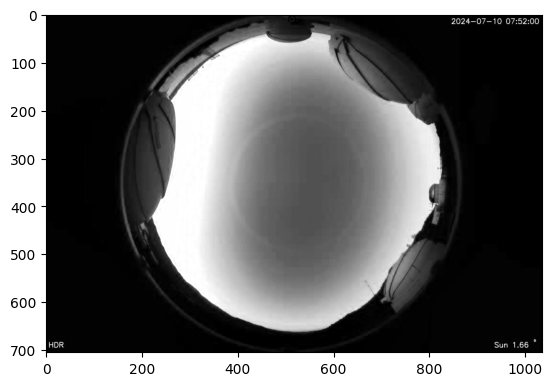

In [44]:
path = r"C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Chile\2024-07\2024-07-10\638562091454898763.png"
img = cv2.imread(path)
B,G,R = cv2.split(img)
clahe = cv2.createCLAHE(clipLimit=0.001, tileGridSize=(7,7))
clahe_image = clahe.apply(B)
plt.imshow(clahe_image,cmap='gray')

True

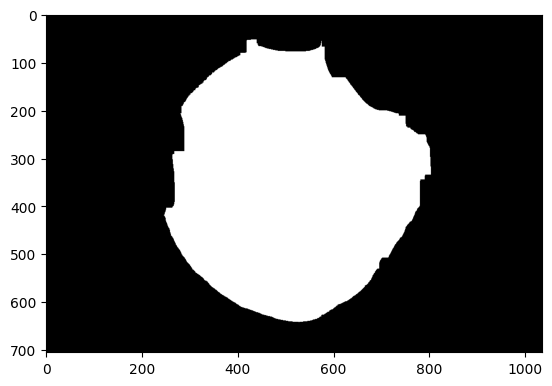

In [45]:
_,thresh = cv2.threshold(clahe_image,78,255,cv2.THRESH_BINARY)
kernel = np.array([
    [1, -1, 1],
    [1, -1, 1],
    [1, -1, 1]
])
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
dilated = cv2.dilate(thresh, kernel, iterations=10)
erosion = cv2.erode(opening, kernel, iterations=20)
plt.imshow(erosion,cmap='gray')
cv2.imwrite('mask_chile.png',erosion)